### Libraries Used

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from skimage import io
import imgaug.augmenters as ia
from imgaug import augmenters, imgaug
from PIL import Image, ImageEnhance , ImageFilter
import warnings
warnings.filterwarnings('ignore')

### Image Review

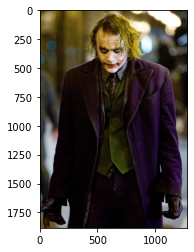

In [2]:
# opening the image from device
img = Image.open("Heath_Ledger_as_the_Joker.JPG.jpg")
imgPlot = plt.imshow(img)
plt.show()

#### Cropping the image to focus only on the face and save it

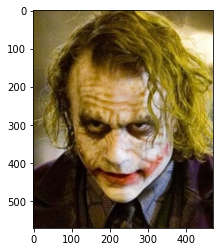

In [3]:
x_center = img.width/2
y_center = img.height/2
x1 = x_center - 250
y1 = y_center - 900
x2 = x_center + 220
y2 = y_center - 330
croppedImage = img.crop((x1, y1, x2, y2))
croppedImage.save('Joker_Cropped.jpg')
imgPlot = plt.imshow(croppedImage)
plt.show()

##### image cropped successfully

In [4]:
# defining a function to plot the image

def imagePlot(image):
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    plt.title('Red')
    plt.hist(img[:,:,0].ravel(), bins=64, color='r')
    plt.subplot(1,3,2)
    plt.title('Green')
    plt.hist(img[:,:,1].ravel(), bins=64, color='g')
    plt.subplot(1,3,3)
    plt.title('Blue')
    plt.hist(img[:,:,2].ravel(), bins=64, color='b')
    plt.show()

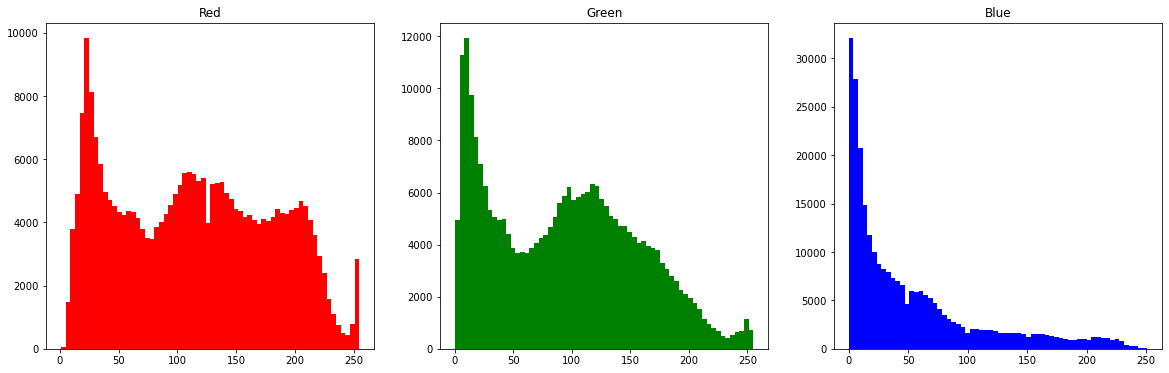

In [5]:
# ploting the image
img = io.imread("Joker_Cropped.jpg")
imagePlot(img)

In [6]:
# saving a copy from the image
img = croppedImage.copy()

#### Adding Sharpness and Brightness to the image

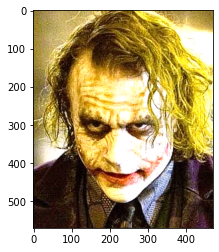

In [7]:
enhancer = ImageEnhance.Sharpness(img)
img = enhancer.enhance(6)
enhancer = ImageEnhance.Brightness(img)
img = enhancer.enhance(1.5)
imgPlot = plt.imshow(img)
plt.show()

#### Adding Color to the image

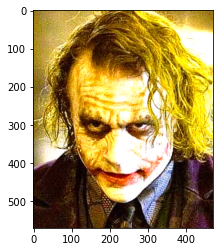

In [8]:
enhancer = ImageEnhance.Color(img)
img = enhancer.enhance(1.3)
imgPlot = plt.imshow(img)
plt.show()

#### Adding Contrast to the image

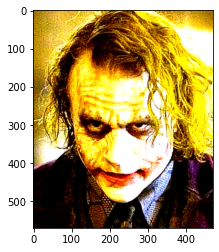

In [9]:
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(1.5)
img.save('Joker_Enhanced_Contrast.jpg')
imgPlot = plt.imshow(img)
plt.show()

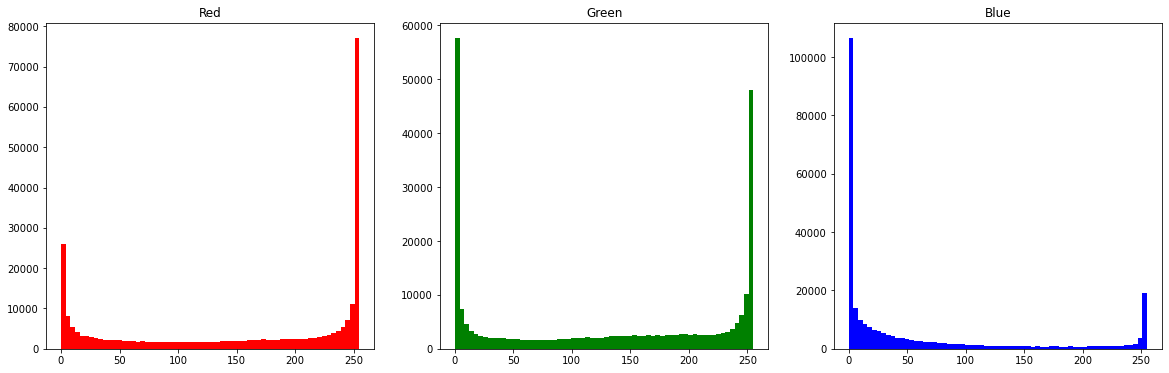

In [10]:
# plotting the enhanced image
img = io.imread("Joker_Enhanced_Contrast.jpg")
imagePlot(img)

#### Adding Blur to Image

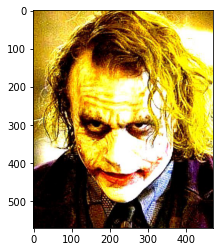

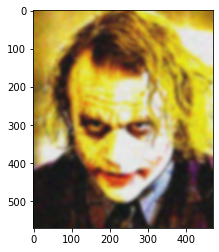

In [11]:
imgPlot = plt.imshow(img)
plt.show()
imgBlur = augmenters.AdditiveGaussianNoise(scale=60)(images=np.array(img))
imgBlur = Image.fromarray(imgBlur)
imgBlur = imgBlur.filter(ImageFilter.GaussianBlur(radius=4))
imgPlot = plt.imshow(imgBlur)
plt.show()

#### Adding noise to the image

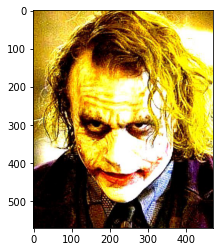

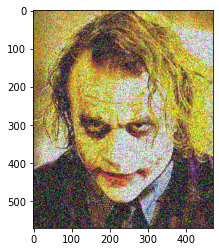

In [24]:
augmenters = ia.SaltAndPepper(0.40, per_channel=True)
imgPlot = plt.imshow(img)
plt.show()
imgSalt = augmenters(images=np.array(img))
imgPlot = plt.imshow(imgSalt)
plt.show()

In [28]:
imgGrey = Image.fromarray(img)

imgGrey = imgGrey.convert("RGB")

#image.save('test_test.jpg')

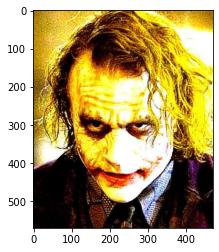

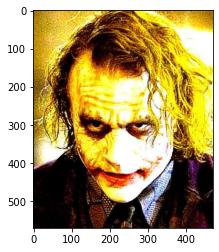

In [29]:
# getting black & white image
imgPlot = plt.imshow(img)
plt.show()
imgPlot = plt.imshow(imgGrey)
imgGrey.save('JokerGreyImage.jpg')
plt.show()

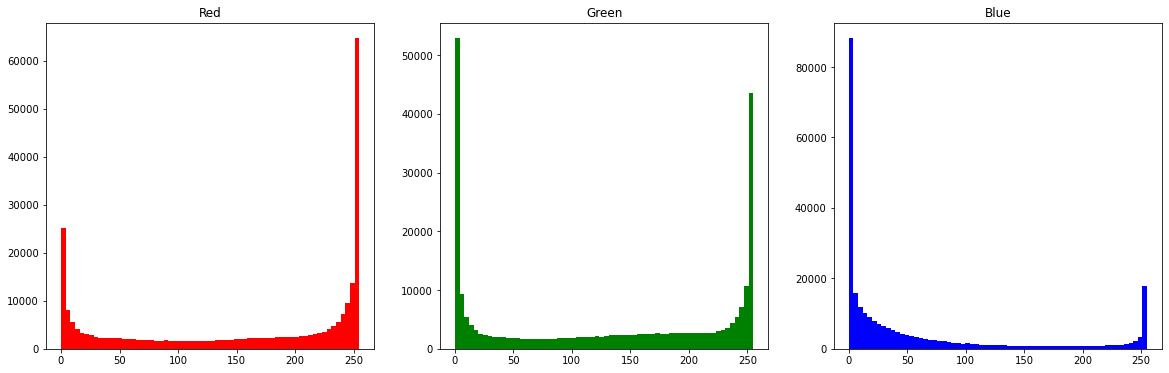

In [27]:
# plotting the image
img = io.imread("JokerGreyImage.jpg")
imagePlot(img)

#### Done